<div class="alert alert-info" style="background-color: #e4faeb;  font-family: Arial, sans-serif; color: #003366; border-color: #c5e8d3;">
    <span style="font-size:1.1em; font-variant:small-caps">Final Tasks for the course "Introduction to Data Analysis in Python"</span><br/>
    <strong><a href="final_tasks.ipynb" target="_blank" download style="color: #003366;">Download Notebook</a>⇩ </strong> (
    <a href="final_tasks_solutions.ipynb" target="_blank" download style="color: #003366;">Solutions</a>⇩)
</div>

<div class="alert alert-warning">
    <span style="font-size:1.1em; font-variant:small-caps"> Download the dataset</span><br/>
    This is just a fallback option if you experience issues with the automatic download method in this notebook<br/>
    <strong><a href="airquality.txt" target="_blank" download>airquality(.txt file)</a>⇩ </strong>
</div>
<hr/>
<div id="toc"></div>
<div id="btntop"><a href="#" id="scrolltop" title="Go to top" target="_self">&#129053;</a></div>

# Final Tasks for the course “Introduction to Data Analysis in Python”

In these final tasks, you will work with the classic **airquality** dataset from R. This dataset contains measurements of air quality in New York, from May to September 1973.

The goal is to apply what you have learned in this course:

1. Loading and cleaning a dataset. Filtering and subsetting data.
2. Visualization methods  
3. Interpreting descriptive statistics
4. Statistical tests  
5. Regression models (simple and multiple)

## Task 1: Exploring and cleaning the dataset

The dataset is loaded from the R package `datasets` via `statsmodels`. The resulting DataFrame is stored in the variable `air`:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

air = pd.read_csv("airquality.txt", index_col=0) # load the dataset from the currect working directory (to check: os.getcwd())

- **a)** Display:

   - the first 5 rows,
   - information about the columns along with the data types,
   - basic descriptive statistics.
This gives you a first overview of the data.

In [2]:
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
rownames,,,,,,
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5


In [3]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 8.4 KB


In [4]:
air.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


- **b)** Dataset cleaning

   - **(i)** Check how many missing values there are in each column.
   - **(ii)** Rename the column `"Solar.R"` to `"Solar_R"` to make it easier to use in formulas.
   - **(iii)** Create a cleaned version of the dataset called `air_clean`, where you remove all rows that have missing values in any of the columns `["Ozone", "Solar_R", "Wind", "Temp"]`.
   - **(iv)** Print the shapes of `air` and `air_clean` to see how many rows were removed.

In [5]:
air.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [6]:
air.rename(columns={"Solar.R": "Solar_R"}, inplace=True)
air

,Ozone,Solar_R,Wind,Temp,Month,Day
rownames,,,,,,
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
149,30.0,193.0,6.9,70,9,26
150,NaN,145.0,13.2,77,9,27
151,14.0,191.0,14.3,75,9,28


In [7]:
air_clean = air.dropna()
air_clean

,Ozone,Solar_R,Wind,Temp,Month,Day
rownames,,,,,,
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
148,14.0,20.0,16.6,63,9,25
149,30.0,193.0,6.9,70,9,26
151,14.0,191.0,14.3,75,9,28


In [8]:
print(f"{air.shape[0] - air_clean.shape[0]} amount of rows were removed.")

42 amount of rows were removed.


## Task 2: Filtering, subsetting, and comparing the data.

- **a)** On how many days is `Ozone` at least 100? What is the mean temperature (`Temp`) on these high-ozone days? Compare the mean `Temp` on high-ozone days with the overall mean `Temp`. 

In [9]:
print(f"{air_clean[air_clean["Ozone"] > 100].shape[0]} amount of days have Ozone at least 100.")
print(f"Mean temperature on days with Ozone values higher than 100 is {air_clean[air_clean["Ozone"] > 100]["Temp"].mean()}.")
print(f"Overall, the mean temperature is {air_clean["Temp"].mean().round(2)}")

7 amount of days have Ozone at least 100.
Mean temperature on days with Ozone values higher than 100 is 86.0.
Overall, the mean temperature is 77.79


- **b)** Comparing the ozone level:
   - **(i)** Which month has the largest outlier in `Ozone`? Which month has the highest number of ozone outliers?
   - **(ii)** Create a subset `air_mid_summer` that contains only midsummer months (July, August) and a subset `air_others` that contains the remaining months (May, June, September).
   - **(iii)** Do midsummer months (June-August) tend to have **higher ozone** levels than the other months? Is this difference statistically significant Perform a suitable statistical test and check whether the assumptions for this test are satisfied.

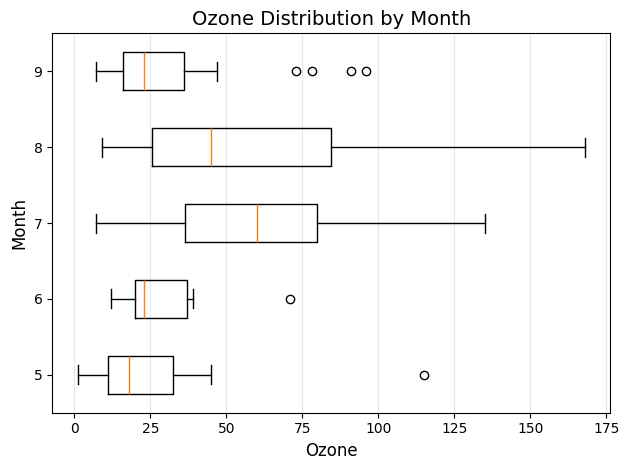

In [10]:
air_clean_grouped = [air_clean[air_clean["Month"] == month]["Ozone"] for month in sorted(air_clean["Month"].unique())]
month_labels = sorted(air_clean["Month"].unique())

plt.boxplot(air_clean_grouped, tick_labels=month_labels, vert=False)
plt.xlabel('Ozone', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.title('Ozone Distribution by Month', fontsize=14)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show();

In [11]:
# It can be seen from the plots that largest outlier is in month May.
# The highest value of Ozone can be observed in month August.

In [12]:
air_mid_summer = air_clean[air_clean["Month"].isin([7, 8])]
air_mid_summer

,Ozone,Solar_R,Wind,Temp,Month,Day
rownames,,,,,,
62,135.0,269.0,4.1,84,7,1
63,49.0,248.0,9.2,85,7,2
64,32.0,236.0,9.2,81,7,3
66,64.0,175.0,4.6,83,7,5
67,40.0,314.0,10.9,83,7,6
68,77.0,276.0,5.1,88,7,7
69,97.0,267.0,6.3,92,7,8
70,97.0,272.0,5.7,92,7,9
71,85.0,175.0,7.4,89,7,10


In [13]:
air_mid_others = air_clean[air_clean["Month"].isin([5, 6, 9])]
air_mid_others

,Ozone,Solar_R,Wind,Temp,Month,Day
rownames,,,,,,
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
7,23.0,299.0,8.6,65,5,7
...,...,...,...,...,...,...
148,14.0,20.0,16.6,63,9,25
149,30.0,193.0,6.9,70,9,26
151,14.0,191.0,14.3,75,9,28


In [14]:
stat_mid, p_mid = stats.shapiro(air_mid_summer["Ozone"])
stat_other, p_other = stats.shapiro(air_mid_others["Ozone"])

print(f"Shapiro-Wilk P-values -> Midsummer: {p_mid:.4f}, Others: {p_other:.4f}")

Shapiro-Wilk P-values -> Midsummer: 0.0717, Others: 0.0000


In [15]:
# We cannot use t-test, because it assumes normality for both of the groups
# Using Mann-Whitney U Test

u_stat, p_val = stats.mannwhitneyu(air_mid_summer["Ozone"], air_mid_others["Ozone"], alternative='greater')

print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("Result: Significant. Midsummer Ozone levels are statistically higher.")
else:
    print("Result: Not significant.")

Mann-Whitney U Statistic: 2351.0
P-value: 0.00000
Result: Significant. Midsummer Ozone levels are statistically higher.


- **c)** 'Hot and Calm' conditions:
  - **(i)** From `air_clean`, filter the days with `Temp >= 85` and `Wind <= 10`. Store them as `air_hot_calm` and display the first 10 rows.
  - **(ii)** How many days satisfy these 'hot and calm' conditions?
  - **(iii)** Compare the mean `Ozone` in `air_hot_calm` with the overall mean `Ozone` in `air_clean`. What does this suggest about the relationship between ozone, temperature, and wind?

In [16]:
air_hot_calm = air_clean[(air_clean["Temp"] >= 85) & (air_clean["Wind"] <= 10)]
air_hot_calm.head(10)

,Ozone,Solar_R,Wind,Temp,Month,Day
rownames,,,,,,
63,49.0,248.0,9.2,85,7,2
68,77.0,276.0,5.1,88,7,7
69,97.0,267.0,6.3,92,7,8
70,97.0,272.0,5.7,92,7,9
71,85.0,175.0,7.4,89,7,10
80,79.0,187.0,5.1,87,7,19
85,80.0,294.0,8.6,86,7,24
86,108.0,223.0,8.0,85,7,25
89,82.0,213.0,7.4,88,7,28


In [17]:
print(f"{air_hot_calm.shape[0]} days are hot and calm.")

22 days are hot and calm.


In [18]:
stat_mid, p_mid = stats.shapiro(air_hot_calm["Ozone"])
stat_other, p_other = stats.shapiro(air_clean["Ozone"])

print(f"Shapiro-Wilk P-values -> Midsummer: {p_mid:.4f}, Others: {p_other:.4f}")

Shapiro-Wilk P-values -> Midsummer: 0.3322, Others: 0.0000


In [19]:
# We cannot use t-test, because it assumes normality for both of the groups
# Using Mann-Whitney U Test

u_stat, p_val = stats.mannwhitneyu(air_hot_calm["Ozone"], air_clean["Ozone"], alternative='greater')

print(f"Mann-Whitney U Statistic: {u_stat}")
print(f"P-value: {p_val:.5f}")

if p_val < 0.05:
    print("Result: Significant. Hot Calm Days' Ozone levels are statistically higher.")
else:
    print("Result: Not significant.")

Mann-Whitney U Statistic: 2094.0
P-value: 0.00000
Result: Significant. Hot Calm Days' Ozone levels are statistically higher.


## Task 3: Regression models

In this final part, we build regression models with `Ozone` as the response variable. We use the cleaned dataset `air_clean`.

**a)** Simple linear regression  
Fit a simple linear regression model

$$\text{Ozone} = b_0 + b_1 \cdot \text{Temp} + \varepsilon$$

using [statsmodels.regression.linear_model.OLS( )](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS) for the formula `"Ozone ~ Temp"`.

   - Write down the equation of the fitted regression line.
   - Does `Temp` have a significant influence on the `Ozone`? 
   - Interpret the sign of $b_1$ (is `Ozone` increasing or decreasing with `Temp`).
   - Print the model summary and, in addition, $R^2,$ adjusted $R^2$, and the residual standard error (RSE).

In [20]:
model_1 = smf.ols(formula="Ozone ~ Temp", data=air_clean)
res_1 = model_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           1.55e-17
Time:                        16:48:16   Log-Likelihood:                -508.89
No. Observations:                 111   AIC:                             1022.
Df Residuals:                     109   BIC:                             1027.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -147.6461     18.755     -7.872      0.0

In [21]:
# Fitted equation: Ozone = -147.65 + (2.44 * Temp)
# p value < 0.05, Temp has a significant influence on Ozone.
# For each increase in Temp, Ozone increases by 2.44.

rse_1 = np.sqrt(res_1.mse_resid)
print(f"R-squared: {res_1.rsquared:.4f}")
print(f"Adj R-squared: {res_1.rsquared_adj:.4f}")
print(f"RSE: {rse_1:.4f}")
print(f"Coefficients: Intercept = {res_1.params['Intercept']:.2f}, Temp = {res_1.params['Temp']:.2f}")

R-squared: 0.4880
Adj R-squared: 0.4833
RSE: 23.9202
Coefficients: Intercept = -147.65, Temp = 2.44


**b)** Multiple regression 
Fit a multiple regression model with predictors `Temp` and `Wind`:

- **(i)** Use the formula `"Ozone ~ Temp + Wind"`:
  $$\text{Ozone} = b_0 + b_1 \cdot \text{Temp} + b_2 \cdot \text{Wind} + \varepsilon$$
   - Write down the equation of the fitted regression line.
   - Is each coefficient significant in this model?  
   - Print $R^2$ and adjusted $R^2$.
   - Comment on the effect of `Wind` (is higher `Wind` associated with higher or lower `Ozone`, given `Temp`?)

- **(ii)** For the multiple regression model `"Ozone ~ Temp + Wind"`:

   - Create a **standardized residuals (internally studentized) vs fitted values** plot to check linearity and homoscedasticity.
   - Check the normality assumption of the residuals by performing the Shapiro-Wilk test.

- **(iii)** Extend the model further by including `Solar_R`:

$$\text{Ozone} = b_0 + b_1 \cdot \text{Temp} + b_2 \cdot \text{Wind} + b_3 \cdot \text{Solar\_R} + \varepsilon$$

   - Fit the model and display the estimated coefficients of the regression line. Write down the equation of the fitted regression line.
   - Is each coefficient significant in this model? 

In [22]:
model_2 = smf.ols(formula="Ozone ~ Temp + Wind", data=air_clean)
res_2 = model_2.fit()

print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     74.99
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           3.79e-21
Time:                        16:48:16   Log-Likelihood:                -497.71
No. Observations:                 111   AIC:                             1001.
Df Residuals:                     108   BIC:                             1010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.3220     23.621     -2.850      0.0

In [23]:
# Formula is: Ozone = -67.32 + (1.83 * Temp) - (3.30 * Wind)
# p < 0.05 for both variables. Null hypothesis is rejected: Both Temp and Wind play a significant role in Ozone.
# Ozone decreases as Wind increases, as the coefficient of Wind is negative.
# Ozone increases as Temp increases, as the coefficient of Temp is positive.
# Wind effects Ozone more than Temperature

rse_2 = np.sqrt(res_2.mse_resid)
print(f"R-squared: {res_2.rsquared:.4f}")
print(f"Adj R-squared: {res_2.rsquared_adj:.4f}")
print(f"RSE: {rse_2:.4f}")
print(f"Coefficients: Intercept={res_2.params['Intercept']:.2f}, Temp={res_2.params['Temp']:.2f}, Wind={res_2.params['Wind']:.2f}")

R-squared: 0.5814
Adj R-squared: 0.5736
RSE: 21.7283
Coefficients: Intercept=-67.32, Temp=1.83, Wind=-3.29


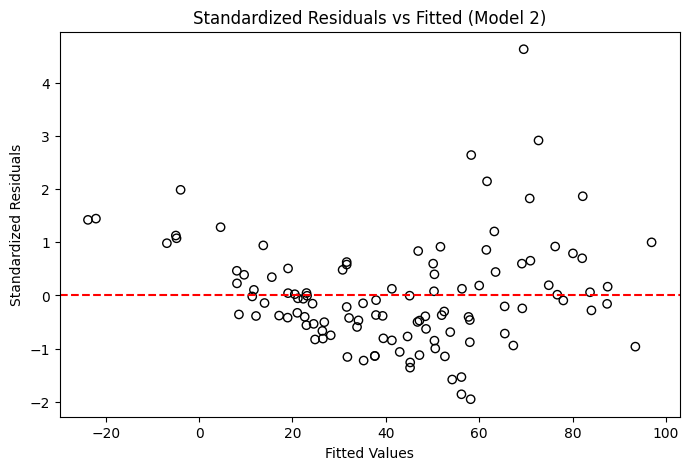

In [24]:
fitted_vals = res_2.fittedvalues

student_resid = res_2.get_influence().resid_studentized_internal

plt.figure(figsize=(8, 5))
plt.scatter(fitted_vals, student_resid, edgecolors='k', facecolors='none')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Fitted (Model 2)')
plt.show()

In [25]:
stat, p_val = stats.shapiro(res_2.resid)
print(f"Shapiro-Wilk Test P-value: {p_val:.5f}")

if p_val < 0.05:
    print("The residuals are not normally distributed (Assumption violated).")
else:
    print("The residuals are normally distributed.")

Shapiro-Wilk Test P-value: 0.00002
The residuals are not normally distributed (Assumption violated).


In [26]:
model_3 = smf.ols(formula="Ozone ~ Temp + Wind + Solar_R", data=air_clean)
res_3 = model_3.fit()

print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     54.83
Date:                Sun, 07 Dec 2025   Prob (F-statistic):           1.51e-21
Time:                        16:48:16   Log-Likelihood:                -494.36
No. Observations:                 111   AIC:                             996.7
Df Residuals:                     107   BIC:                             1008.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -64.3421     23.055     -2.791      0.0

In [27]:
# Formula is: Ozone = -64.34 + (1.65 * Temp) + (-3.33 * Wind) + (0.06 * Solar_R)
# p < 0.05 for Temp and Wind, but p > 0.05 for Solar_R. Temp and Wind play a significant role in Ozone, whereas Solar_R does not.
# Solar_R has a positive coefficient, meaning higher solar radiation is associated with higher Ozone levels.

rse_3 = np.sqrt(res_3.mse_resid)
print(f"R-squared: {res_3.rsquared:.4f}")
print(f"Adj R-squared: {res_3.rsquared_adj:.4f}")
print(f"RSE: {rse_3:.4f}")
print(f"Coefficients: Intercept={res_3.params['Intercept']:.2f}, Temp={res_3.params['Temp']:.2f}, Wind={res_3.params['Wind']:.2f}, Solar_R={res_3.params['Solar_R']:.2f}")

R-squared: 0.6059
Adj R-squared: 0.5948
RSE: 21.1808
Coefficients: Intercept=-64.34, Temp=1.65, Wind=-3.33, Solar_R=0.06


 **c)** Compare Model 1 and Model 3:
- Put $R^2$, adjusted $R^2$, and the residual standard error (RSE) into a small comparison table and compare the models.
- Which model do you prefer on the basis of these values?

In [28]:
comparison = pd.DataFrame({
    'Metric': ['R-squared', 'Adj R-squared', 'RSE'],
    'Model 1 (Temp)': [res_1.rsquared, res_1.rsquared_adj, rse_1],
    'Model 3 (Full)': [res_3.rsquared, res_3.rsquared_adj, rse_3]
})

print(comparison.round(4))

          Metric  Model 1 (Temp)  Model 3 (Full)
0      R-squared          0.4880          0.6059
1  Adj R-squared          0.4833          0.5948
2            RSE         23.9202         21.1808


In [29]:
# As the R-squared values are higher, and RSE is lower in Model 3, I would go for model 3.